# Measure Spoken Word Timing

The purpose of this notebook is to measure how long the speaker takes to speak a word. This metric might be useful to determine when Gentle fails to align the audio and text.

In [1]:
import sys

# Setup the "PYTHONPATH"
sys.path.insert(0, '../../')

%matplotlib inline

In [2]:
from pathlib import Path

import json

from src.audio import read_audio

sample_rate = 44100
seconds_to_samples = lambda seconds: int(round(seconds * sample_rate))
alignment = Path('../../data/Hillary/.gentle/Scripts 34-39.json')
audio = Path('../../data/Hillary Source/wavs/Scripts 34-39.wav')

assert alignment.is_file()
assert audio.is_file()

alignment = json.loads(alignment.read_text())
audio = read_audio(audio, sample_rate=sample_rate)

No config for `audio.read_audio` (`src.audio.read_audio`)


In [4]:
from IPython.display import Audio
from IPython.display import Markdown

import json
import statistics
import pprint
import random

pprint = pprint.PrettyPrinter(indent=2)
words = alignment['words']

for word in words:
    if word['case'] == 'success' and word['alignedWord'] != '<unk>':
        word['timing'] = ((word['end'] - word['start']) /
                          (word['endOffset'] - word['startOffset']))
words = [w for w in words if 'timing' in w]
times = [w['timing'] for w in words]

print('STD:', statistics.stdev(times))
print('Mean:', statistics.mean(times))
sample = sorted(words, key=lambda w: w['timing'])[:3000]
sample = random.sample(sample, 100)
sample = sorted(sample, key=lambda w: w['timing'])

for word in sample:
    start_sample = seconds_to_samples(word['start'])
    end_sample = seconds_to_samples(word['end'])
    display(Markdown('**Text:** "' + word['word'] + '"'))
    display(Markdown('**Timing:** "' + str(word['timing']) + '"'))
    display(Audio(data=audio[start_sample:end_sample], rate=sample_rate))


STD: 0.02995302078787163
Mean: 0.08154774227122238


**Text:** "the"

**Timing:** "0.006666666666660603"

**Text:** "the"

**Timing:** "0.029999999999972715"

**Text:** "the"

**Timing:** "0.030000000000048505"

**Text:** "the"

**Timing:** "0.03333333333330302"

**Text:** "have"

**Timing:** "0.03499999999999659"

**Text:** "the"

**Timing:** "0.03666666666667121"

**Text:** "there"

**Timing:** "0.03999999999996362"

**Text:** "thought"

**Timing:** "0.0399999999999961"

**Text:** "the"

**Timing:** "0.040000000000001514"

**Text:** "their"

**Timing:** "0.0400000000000091"

**Text:** "that"

**Timing:** "0.04250000000001819"

**Text:** "that"

**Timing:** "0.04250000000001819"

**Text:** "The"

**Timing:** "0.043333333333331815"

**Text:** "the"

**Timing:** "0.043333333333331815"

**Text:** "these"

**Timing:** "0.04399999999995998"

**Text:** "there"

**Timing:** "0.04400000000000546"

**Text:** "management"

**Timing:** "0.04400000000000546"

**Text:** "tell"

**Timing:** "0.045000000000001705"

**Text:** "that"

**Timing:** "0.045000000000015916"

**Text:** "learned"

**Timing:** "0.0457142857143091"

**Text:** "think"

**Timing:** "0.046000000000003635"

**Text:** "the"

**Timing:** "0.046666666666624224"

**Text:** "the"

**Timing:** "0.046666666666624224"

**Text:** "the"

**Timing:** "0.046666666666624224"

**Text:** "the"

**Timing:** "0.04666666666670002"

**Text:** "have"

**Timing:** "0.04749999999999943"

**Text:** "with"

**Timing:** "0.04750000000001364"

**Text:** "they"

**Timing:** "0.04750000000001364"

**Text:** "them"

**Timing:** "0.04750000000001364"

**Text:** "picking"

**Timing:** "0.04857142857144936"

**Text:** "thought"

**Timing:** "0.04857142857144936"

**Text:** "Business"

**Timing:** "0.048749999999984084"

**Text:** "to"

**Timing:** "0.049999999999954525"

**Text:** "need"

**Timing:** "0.049999999999954525"

**Text:** "a"

**Timing:** "0.049999999999954525"

**Text:** "in"

**Timing:** "0.049999999999954525"

**Text:** "will"

**Timing:** "0.049999999999954525"

**Text:** "your"

**Timing:** "0.05000000000001137"

**Text:** "there"

**Timing:** "0.05200000000004366"

**Text:** "business"

**Timing:** "0.052500000000009095"

**Text:** "our"

**Timing:** "0.05333333333328483"

**Text:** "for"

**Timing:** "0.05333333333328483"

**Text:** "and"

**Timing:** "0.05333333333328483"

**Text:** "and"

**Timing:** "0.05333333333328483"

**Text:** "provides"

**Timing:** "0.053749999999979536"

**Text:** "represents"

**Timing:** "0.05399999999999636"

**Text:** "Compliance"

**Timing:** "0.05399999999999636"

**Text:** "based"

**Timing:** "0.05399999999999636"

**Text:** "goods"

**Timing:** "0.05399999999999636"

**Text:** "in"

**Timing:** "0.05499999999994998"

**Text:** "approaches"

**Timing:** "0.05500000000001819"

**Text:** "be"

**Timing:** "0.055000000000063665"

**Text:** "some"

**Timing:** "0.055000000000063665"

**Text:** "the"

**Timing:** "0.05666666666669092"

**Text:** "medical"

**Timing:** "0.05714285714287014"

**Text:** "researchers"

**Timing:** "0.05727272727272686"

**Text:** "that"

**Timing:** "0.05750000000000455"

**Text:** "management"

**Timing:** "0.05800000000000409"

**Text:** "the"

**Timing:** "0.05999999999994543"

**Text:** "to"

**Timing:** "0.05999999999994543"

**Text:** "break"

**Timing:** "0.05999999999999091"

**Text:** "promotes"

**Timing:** "0.060000000000002274"

**Text:** "make"

**Timing:** "0.060000000000002274"

**Text:** "can"

**Timing:** "0.060000000000021224"

**Text:** "guide"

**Timing:** "0.06000000000003638"

**Text:** "Scottish"

**Timing:** "0.061249999999972715"

**Text:** "management"

**Timing:** "0.061999999999989085"

**Text:** "these"

**Timing:** "0.061999999999989085"

**Text:** "there"

**Timing:** "0.061999999999989085"

**Text:** "conceptual"

**Timing:** "0.061999999999989085"

**Text:** "fetch"

**Timing:** "0.061999999999989085"

**Text:** "treatment"

**Timing:** "0.062222222222216156"

**Text:** "Relationship"

**Timing:** "0.0625"

**Text:** "initial"

**Timing:** "0.06285714285715065"

**Text:** "social"

**Timing:** "0.06333333333335152"

**Text:** "the"

**Timing:** "0.06333333333335152"

**Text:** "all"

**Timing:** "0.06333333333335152"

**Text:** "designed"

**Timing:** "0.06375000000002728"

**Text:** "perceiving"

**Timing:** "0.06399999999998726"

**Text:** "found"

**Timing:** "0.06400000000001001"

**Text:** "given"

**Timing:** "0.06400000000003274"

**Text:** "intelligence"

**Timing:** "0.06499999999999773"

**Text:** "happened"

**Timing:** "0.06499999999999773"

**Text:** "that"

**Timing:** "0.06500000000005457"

**Text:** "territorial"

**Timing:** "0.06545454545454535"

**Text:** "organizational"

**Timing:** "0.06571428571429092"

**Text:** "organization"

**Timing:** "0.0658333333333303"

**Text:** "intelligence"

**Timing:** "0.0658333333333303"

**Text:** "believes"

**Timing:** "0.06624999999996817"

**Text:** "and"

**Timing:** "0.06666666666668182"

**Text:** "worries"

**Timing:** "0.06714285714282855"

**Text:** "between"

**Timing:** "0.06714285714289352"

**Text:** "operational"

**Timing:** "0.06727272727270743"

**Text:** "they"

**Timing:** "0.06749999999999545"

**Text:** "group"

**Timing:** "0.06799999999998363"

**Text:** "every"

**Timing:** "0.06799999999998363"

**Text:** "brain"

**Timing:** "0.0680000000000291"

**Text:** "dreams"

**Timing:** "0.06833333333330908"

**Text:** "psychological"

**Timing:** "0.06846153846154615"

**Text:** "versions"

**Timing:** "0.06874999999999432"

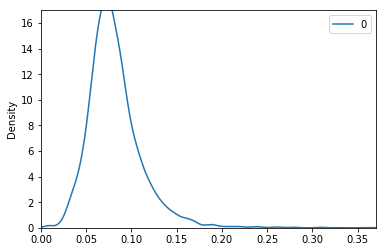

In [30]:
import pandas as pd
pd.DataFrame(times).plot.density(xlim=(0.0, max(times)), ylim=(0.0, 17.0))